In [1]:
import pandas as pd #Dataframe -> load and processing
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')

# Data exploration and treatment

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\T-Gamer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sex', ylabel='Count'>

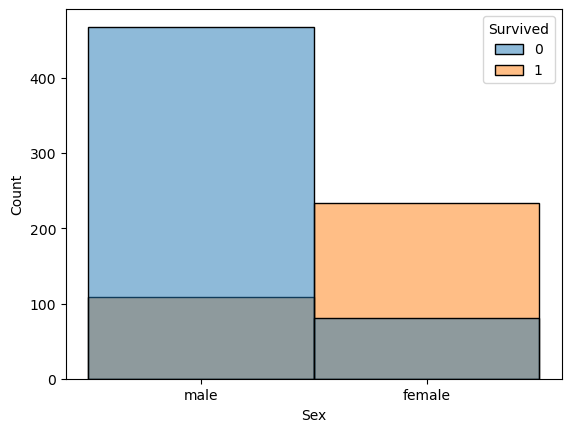

In [5]:
sns.histplot(df_train, x='Sex', hue= 'Survived')

In [6]:
df_train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

C:\Users\T-Gamer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

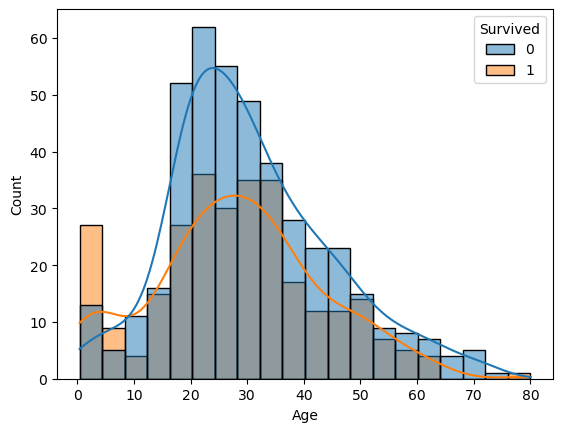

In [7]:
sns.histplot(data=df_train, x='Age', hue ='Survived', kde=True)

Text(30.62617924528302, 40, '30.63')

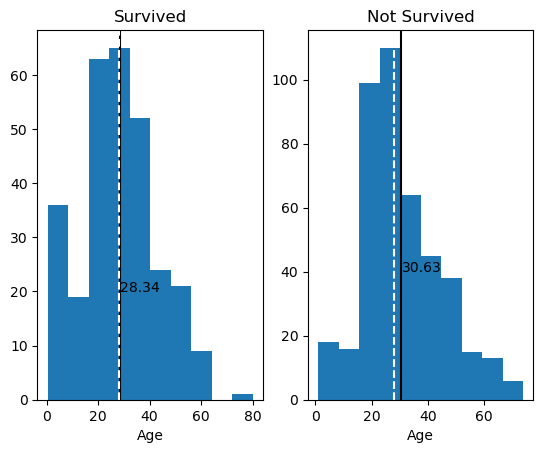

In [8]:
fig, axs = plt.subplots(1,2)

axs[0].hist(df_train[df_train['Survived']==1]['Age'])
axs[0].set_title('Survived')
axs[0].set_xlabel('Age')
axs[0].axvline(df_train[df_train['Survived']==1]['Age'].mean(), color = 'black')
axs[0].axvline(df_train[df_train['Survived']==1]['Age'].median(), color = 'w', linestyle = '--')
axs[0].annotate(df_train[df_train['Survived']==1]['Age'].mean().round(2), xy=(df_train[df_train['Survived']==1]['Age'].mean(), 20))

axs[1].hist(df_train[df_train['Survived']==0]['Age'])
axs[1].set_title('Not Survived')
axs[1].set_xlabel('Age')
axs[1].axvline(df_train[df_train['Survived']==0]['Age'].mean(), color = 'black')
axs[1].axvline(df_train[df_train['Survived']==0]['Age'].median(), color = 'w', linestyle = '--')
axs[1].annotate(df_train[df_train['Survived']==0]['Age'].mean().round(2), xy=(df_train[df_train['Survived']==0]['Age'].mean(), 40))

C:\Users\T-Gamer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pclass', ylabel='Count'>

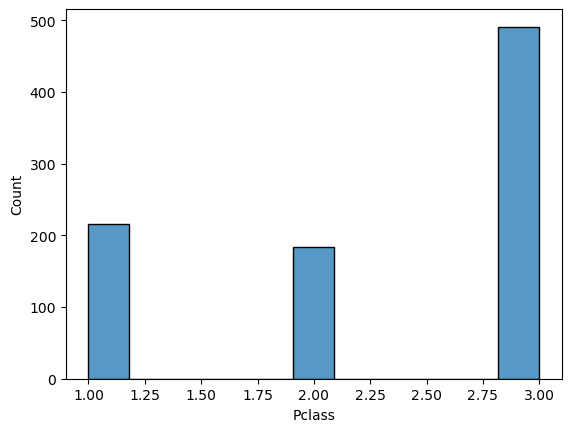

In [9]:
sns.histplot(df_train['Pclass'])

Text(0.5, 1.0, 'Not Survived')

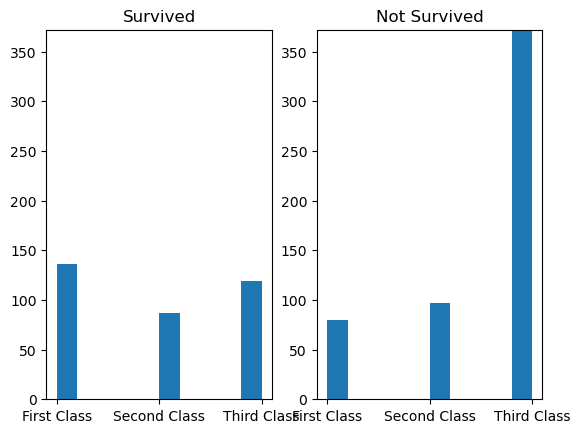

In [10]:
fig, axs = plt.subplots(1,2)

plt.setp(axs, ylim=(0,df_train[df_train['Survived']==0]['Pclass'].value_counts().max()), xticks = [1,2,3], xticklabels = ['First Class','Second Class', 'Third Class'])

axs[0].hist(df_train[df_train['Survived']==1]['Pclass'])
axs[0].set_title('Survived')



axs[1].hist(df_train[df_train['Survived']==0]['Pclass'])
axs[1].set_title('Not Survived')





In [11]:
print(df_train.isna().sum(), '\n', f'NaN total: {df_train.isna().sum().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
 NaN total: 866


Things to look out:
* correlation between columns
* importancy of object type columns (name, ticket, cabin, embarked)
* Sex, age and Pclass maybe are the most important feature to know if a passenger survived or not
* 

## Data treatment

### Dropping columns that are not important for the model

In [12]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
print('Percentage of NaN %.2f%% of total' % (df_train['Cabin'].isna().sum()/len(df_train)*100))

Percentage of NaN 77.10% of total


In [14]:
df_train.select_dtypes('object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


My first idea is to do a simple solution: drop the cabin column which 79% of the data is NaN.\
Sex has an important role definig the survalbility\
PassengerId, Name, Ticket are not important (arbitratry values)\
Embarked is just a control of where the passenger boarded


So i'm dropping PassengerId, Name, Ticket, Cabin, Embarked

In [15]:
treated = df_train.copy() #copying because i wish to continue using the original dataset
treated.drop(columns=['PassengerId','Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace = True)
treated.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### NaN

In [16]:
treated.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Just age has NaN values

Text(29.69911764705882, 20, '29.7')

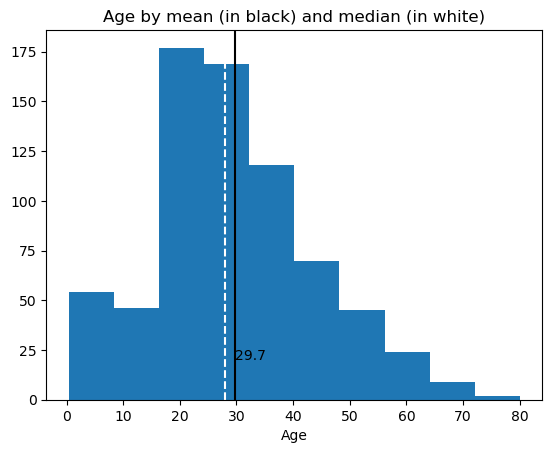

In [17]:
fig, axs = plt.subplots(1,1)

axs.hist(df_train['Age'])
axs.set_title('Age by mean (in black) and median (in white)')
axs.set_xlabel('Age')
axs.axvline(df_train['Age'].mean(), color = 'black')
axs.axvline(df_train['Age'].median(), color = 'w', linestyle = '--')
axs.annotate(df_train['Age'].mean().round(2), xy=(df_train['Age'].mean(), 20))

In [18]:
treated.fillna(treated['Age'].mean(), inplace = True)
treated.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Categorical data

| Variable | Definition | Key |
|----------|------------|-----|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [19]:
treated.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(treated[['Sex', 'Pclass']]).toarray(), columns = ['male', 'class_1', 'class_2', 'class_3'])

treated = pd.concat([treated.drop(['Sex','Pclass'], axis=1), df_encoded], axis =1)
treated


,Survived,Age,SibSp,Parch,Fare,male,class_1,class_2,class_3
0,0,22.000000,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,0.0,1.0,0.0,0.0
2,1,26.000000,0,0,7.9250,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,53.1000,0.0,1.0,0.0,0.0
4,0,35.000000,0,0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1.0,0.0,1.0,0.0
887,1,19.000000,0,0,30.0000,0.0,1.0,0.0,0.0
888,0,29.699118,1,2,23.4500,0.0,0.0,0.0,1.0
889,1,26.000000,0,0,30.0000,1.0,1.0,0.0,0.0


## Back to some analysis

Now our dataset (treated) is only numerical values

In [21]:
#Correlation
treated.corr()

,Survived,Age,SibSp,Parch,Fare,male,class_1,class_2,class_3
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.285904,0.093349,-0.322308
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.319916,0.006589,-0.281004
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.017633,-0.000734,0.015790
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,-0.182333,0.591711,-0.118557,-0.413333
male,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.098013,-0.064746,0.137143
class_1,0.285904,0.319916,-0.054582,-0.017633,0.591711,-0.098013,1.000000,-0.288585,-0.626738
class_2,0.093349,0.006589,-0.055932,-0.000734,-0.118557,-0.064746,-0.288585,1.000000,-0.565210
class_3,-0.322308,-0.281004,0.092548,0.015790,-0.413333,0.137143,-0.626738,-0.565210,1.000000


<Axes: >

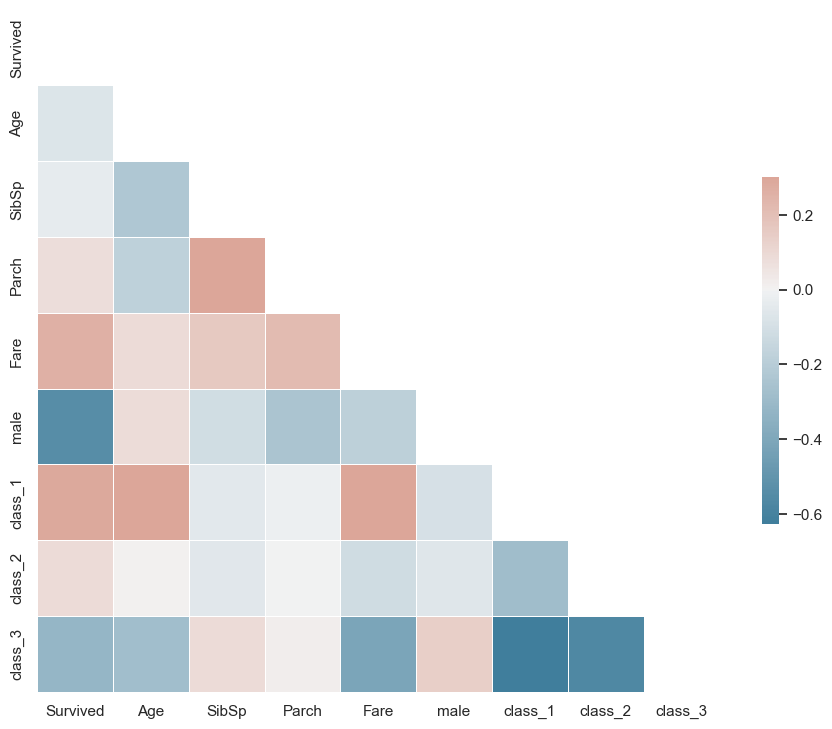

In [22]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = treated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
print('Proportion of males from third class over all males',len(treated[(treated.class_3 == 1) & (treated['male']==1)])/len(treated[(treated.male == 1)]))
print('Proportion of third class passengers', len(treated[(treated.class_3 == 1)])/len(treated) )

Proportion of males from third class over all males 0.6013864818024264
Proportion of third class passengers 0.5510662177328844


## Some insights:
* "Women and children first" seems to be accurate and with that Wealth (first class and more expensive fares) are by far the most impactful features.
* Passengers of lower classes tends to be younger and carries more siblings
* Majority of men are from the third class 60%
* Men tend to be travelling alone (working) and women usually are in families (we are talking about the 1910's)

Some notes
* Analyzing by age may not be ideal since I infer the NaN values based only on the mean (more than a hundred values)
* Fare and Class can be considered a duplicated feature because the pricier the higher class...

In [ ]:
def 

# Model

My idea of approach is to set a baseline predction using a dummy classifier, even though I have already made a model and uploaded to Kaggle which got 70-ish% score.\
I'm looking for using Randomized Grid Search and some classification models, evaluating then with cross validation:
* Decision Tree
* Support Vector Machine
* Support Vector Classifier
* Naive Bayes 
* Logistic Regression
* K Nearest Neighbor 
* Random Forest  
* Xtreme Gradient Boosting 
* Soft Voting Classifier

Cross-validation groups are going to be divided by the K-Fold

Scoring can be trick, at some part I feel like the accuracy score is enough for the challenge, but there are others like recall and f-score  

## Dummy Classifier

In [50]:
from sklearn.dummy import DummyClassifier
SEED = 2024 #setting a seed for replicability

X = treated.drop('Survived', axis=1)
y = treated.Survived

dummy = DummyClassifier(strategy = "stratified", random_state = SEED)
dummy.fit(X, y)
dummy.predict(X)
baseline_score = dummy.score(X,y)
baseline_score

0.547699214365881

In [49]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y, dummy.predict(X))

(array([0.63129496, 0.40895522]),
 array([0.63934426, 0.4005848 ]),
 array([0.63529412, 0.40472674]),
 array([549, 342], dtype=int64))

## Models!

In [55]:
#Importing the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from scipy.stats import randint

In [77]:
scaler = StandardScaler()
cv = KFold(n_splits = 5, random_state=SEED, shuffle = True)

0.7946079969870066